# Import

In [ ]:
import numpy as np
import scipy.integrate as integ
import scipy.interpolate as i2
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)
from astropy import units as u
from astropy import constants as c

import shootingres as shr

import scipy.optimize as o
try:
    import cPickle as pickle
except ImportError:
    import pickle
    
import seaborn as sns
sns.set_theme()
sns.set_style("white")
sns.set_style("ticks")
sns.set_style("ticks",{'axes.grid' : True})
import scienceplots
plt.style.use('science')
f = 16

In [3]:
## SET CONSTANTS
rho = (1.0*10**19) * (2.0*1.6725*10**(-27))
mu_0 = 1.2566*10**(-6)

# Define Normalizations
r1 = 0.1

## Define OMEGA0:
bb = 10000
v0 = bb/np.sqrt(r1)
Omega0 = v0/r1

In [4]:
r1 = 0.1
r2 = 5
reso = 500
r = np.arange(1, 5, 24/reso)
q_mag = 1
guess = 0.39760350887860546+0.02203028300281025j
VA_N = 0.578*8/10
# VA_N = 0.30848

B0 = 0
Bz = VA_N*r1*Omega0*np.sqrt(rho*mu_0)*10000
# VA_N = 30/(r1*Omega0*np.sqrt(rho*mu_0)*10000)
print(VA_N)
print(Bz)
kn = 1
m = 1
k = kn*np.pi/(4)

## NOTE VA_N ~ 30G
# Define Normalizations
r1 = 0.1



0.4624
29.978811690584404


In [5]:
## GET ETA ARR
elecd_init_o = [1]
# elecd_init_o = [0]

elecd_init_c = [-2, -1, 0, 1]

# elecd_arr = [1E-6, 1E-5, 1E-4, 1E-3]
elecd_arr = [1E-6, 1E-5, 1E-4, 1E-3]
# elecd_arr = []
multip_arr = []

# discret = int(8) 
# for j in range(0, discret):
#     multip_arr.append((j+1)*10/(discret))

multip_arr = [0,1,2,3,4,5,6,7,8,9]

# print(multip_arr)

# for j in range(0, len(elecd_init_c)):
#     for k in range(0, len(multip_arr)):
#         elecd_arr.append(np.round(multip_arr[k]*10**(elecd_init_c[j]), np.abs(elecd_init_c[j])+1))
        
for j in range(0, len(elecd_init_c)):
    iter = 2
    for k in range(0, 9*int(iter)):
        elecd_arr.append(np.round((k/iter+1)*10**(elecd_init_c[j]), np.abs(elecd_init_c[j])+1))

for j in range(0, len(elecd_init_o)):
    iter = 10
    for k in range(0, 9*int(iter)):
        elecd_arr.append(np.round((k/iter+1)*10**(elecd_init_o[j]), np.abs(elecd_init_o[j])+1))

elecd_arr.append(100)



# elecd_arr.remove(np.round(int((1))*10**(-elecd_init_o[0]), elecd_init_o[0]))
print(elecd_arr)


[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08, 0.085, 0.09, 0.095, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0, 55.0, 60.0, 65.0, 70.0, 75.0, 80.0, 85.0, 90.0, 95.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100]


# Load Data from NIMROD for AR0

In [6]:

magB = [10, 20, 30, 40, 50, 60, 70, 80, 90]
vA = magB/np.sqrt(rho*mu_0)/1000

eta = ['0.1', '0.5', '1', '2', '5']
r1 = 0.1
### AR0
ETAp1 = [35846.5, 68679.1, 77745.2, 76985.2, 61234.6, 0, 0, 0, 0] #20g measure again later, 50g
ETAp5 = [27205.3, 56108.1, 74311.4, 71762.6, 45595.7, -499.617, -359.597, -359.951, -391.341]
ETA1 = [19358.4, 53125.6, 68772.6, 65255.9, 0, -378.527, -359.787, -352.013, -385.34]
ETA2 = [4423.17, 44335.2, 57086.1, 52861.6, 26814.8, -375.771, -372.755, -406.902, -349.718]
ETA5 = [-1553.78, 13137.6, 22970.8, 17757.6, -385.555, -364.498, -361.204, -355.112, -352.569]


magB = [10, 20, 30, 40, 50, 60, 70, 80,90]
vA = magB/np.sqrt(rho*mu_0)/10000
gauss = [10, 20, 30, 40, 50, 60, 70, 80, 90]
vA = np.zeros([len(gauss)])
for j in range(0, len(gauss)):
    vA[j] = gauss[j] / np.sqrt(mu_0*rho)
    
gr_tot_AR0 = [ETAp1, ETAp5, ETA1, ETA2, ETA5]

etaplot_AR0 = []
for i in range(0, len(gr_tot_AR0)):
    etai = np.zeros(len(gr_tot_AR0[i]))
    for j in range(0, len(gr_tot_AR0[i])):
        if(gr_tot_AR0[i][j] < 0):
            gr_tot_AR0[i][j] = 0
        etai[j] = gr_tot_AR0[i][j]
    etaplot_AR0.append(etai)

# Load Data from NIMROD for AR2

In [7]:

ETAp1 = [43901.9, 75288.7, 85502.6, 76841.8, 49832.2, 29791.2, 18548.3, 13093.1, 3976.37]
ETAp5 = [28223.4, 56916.7, 65286.6, 61637.7, 42409.8, 25046.9, 16044, 10842.5, 3748.9]
ETA1 = [19164.2, 46495.2, 56709.9, 53031.9, 37517.9, 23040.2, 14893.2, 10136.4, 3514.04]
ETA2 = [-884.111, 34393.6, 45017.6, 42948.5, 31869, 20687.1, 13276.7, 3533.12, 3792.31]
ETA5 = [-462.852, 15662.4, 26880.6, 27991.8, 22514.6, 15624.5, 10945.5, 0, 3666.12] ## Measure 10g again later.
ETA5_curr= [-462.852, 15662.4, 26880.6, 27991.8, 22514.6, 15624.5, 10945.5, 3666.12] ## Measure 10g again later.

# gr_tot = [gr_10g, gr_20g, gr_30g, gr_40g, gr_50g, gr_60g, gr_70g, gr_80g, gr_90g]
gr_tot_AR2 = [ETAp1, ETAp5, ETA1, ETA2, ETA5]

gauss_ETA5 = [10, 20, 30, 40, 50, 60, 70, 90]
vA_ETA5 = np.zeros([len(gauss_ETA5)])
for j in range(0, len(gauss_ETA5)):
    vA_ETA5[j] = gauss_ETA5[j] / np.sqrt(mu_0*rho)
    

etaplot_AR2 = []
for i in range(0, len(gr_tot_AR2)):
    etai = np.zeros(len(gr_tot_AR2[i]))
    for j in range(0, len(gr_tot_AR2[i])):
        if(gr_tot_AR2[i][j] < 0):
            gr_tot_AR2[i][j] = 0
        etai[j] = gr_tot_AR2[i][j]
    etaplot_AR2.append(etai)
    

# Load Data from Shooting for AR0

In [8]:
r2 = 1.4
OmegaOut = v0/r2

MCI 1k1

In [9]:
elecd_str = '0'
guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesu_' + elecd_str + '-AR0-Az.pkl'
guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesd_' + elecd_str + '-AR0-Az.pkl'
VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANUP_' + elecd_str + '-AR0-Az.pkl'
VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANDOWN_' + elecd_str + '-AR0-Az.pkl'
with open(VA_d, 'rb') as f:
    VA_l_MCI1_AR0 = pickle.load(f)    
with open(VA_u, 'rb') as f:
    VA_h_MCI1_AR0 = pickle.load(f)    
    
    
with open(guesses_str_d, 'rb') as f:
    guesses_1k1_MCI_l = pickle.load(f)    
with open(guesses_str_u, 'rb') as f:
    guesses_1k1_MCI_h = pickle.load(f)    

# VA_h_cut = []
gr_1k1_MCI_l_AR0 = []
gr_1k1_MCI_h_AR0 = []
for j in range(0,len(guesses_1k1_MCI_l) ):
    gr_1k1_MCI_l_AR0.append(guesses_1k1_MCI_l[j].imag)
    
for j in range(0,len(guesses_1k1_MCI_h)):
    gr_1k1_MCI_h_AR0.append(guesses_1k1_MCI_h[j].imag)   
     
freq_1k1_MCI_l_AR0 = []
freq_1k1_MCI_h_AR0 = []
for j in range(0,len(guesses_1k1_MCI_l) ):
    freq_1k1_MCI_l_AR0.append(guesses_1k1_MCI_l[j].real)
    
for j in range(0,len(guesses_1k1_MCI_h)):
    freq_1k1_MCI_h_AR0.append(guesses_1k1_MCI_h[j].real)    
    # VA_h_cut.append(VA_h_MRI1[j])

# VA_h_MRI1 = VA_h_cut
   

In [10]:
elecd_str = '0'
guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MRI_1k1_guessesu_' + elecd_str + '-AR0-Az.pkl'
guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MRI_1k1_guessesd_' + elecd_str + '-AR0-Az.pkl'
VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MRI_1k1_VANUP_' + elecd_str + '-AR0-Az.pkl'
VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MRI_1k1_VANDOWN_' + elecd_str + '-AR0-Az.pkl'
with open(VA_d, 'rb') as f:
    VA_l_MRI1_AR0 = pickle.load(f)    
with open(VA_u, 'rb') as f:
    VA_h_MRI1_AR0 = pickle.load(f)    
    
    
with open(guesses_str_d, 'rb') as f:
    guesses_1k1_MCI_l = pickle.load(f)    
with open(guesses_str_u, 'rb') as f:
    guesses_1k1_MCI_h = pickle.load(f)    

# VA_h_cut = []
gr_1k1_MRI_l_AR0 = []
gr_1k1_MRI_h_AR0 = []
for j in range(0,len(guesses_1k1_MCI_l) ):
    gr_1k1_MRI_l_AR0.append(guesses_1k1_MCI_l[j].imag)
    
for j in range(0,len(guesses_1k1_MCI_h)):
    gr_1k1_MRI_h_AR0.append(guesses_1k1_MCI_h[j].imag)   
     
freq_1k1_MRI_l_AR0 = []
freq_1k1_MRI_h_AR0 = []
for j in range(0,len(guesses_1k1_MCI_l) ):
    freq_1k1_MRI_l_AR0.append(guesses_1k1_MCI_l[j].real)
    
for j in range(0,len(guesses_1k1_MCI_h)):
    freq_1k1_MRI_h_AR0.append(guesses_1k1_MCI_h[j].real)    
    # VA_h_cut.append(VA_h_MRI1[j])

# VA_h_MRI1 = VA_h_cut

In [11]:
elecd_str = '1'
guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesu_' + elecd_str + '-kep-Az-res-divr-qmag10pi-AR0.pkl'
guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesd_' + elecd_str + '-kep-Az-res-divr-qmag10pi-AR0.pkl'
VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANUP_' + elecd_str + '-kep-Az-res-divr-qmag10pi-AR0.pkl'
VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANDOWN_' + elecd_str + '-kep-Az-res-divr-qmag10pi-AR0.pkl'
with open(VA_d, 'rb') as f:
    VA_l_MCI1_AR0_ETA1 = pickle.load(f)    
with open(VA_u, 'rb') as f:
    VA_h_MCI1_AR0_ETA1 = pickle.load(f)    
    
    
with open(guesses_str_d, 'rb') as f:
    guesses_1k1_MCI_l = pickle.load(f)    
with open(guesses_str_u, 'rb') as f:
    guesses_1k1_MCI_h = pickle.load(f)    

# VA_h_cut = []
gr_1k1_MCI_l_AR0_ETA1 = []
gr_1k1_MCI_h_AR0_ETA1 = []
for j in range(0,len(guesses_1k1_MCI_l) ):
    gr_1k1_MCI_l_AR0_ETA1.append(guesses_1k1_MCI_l[j].imag)
    
for j in range(0,len(guesses_1k1_MCI_h)):
    gr_1k1_MCI_h_AR0_ETA1.append(guesses_1k1_MCI_h[j].imag)   
     
freq_1k1_MCI_l_AR0_ETA1 = []
freq_1k1_MCI_h_AR0_ETA1 = []
for j in range(0,len(guesses_1k1_MCI_l) ):
    freq_1k1_MCI_l_AR0_ETA1.append(guesses_1k1_MCI_l[j].real)
    
for j in range(0,len(guesses_1k1_MCI_h)):
    freq_1k1_MCI_h_AR0_ETA1.append(guesses_1k1_MCI_h[j].real)    
    # VA_h_cut.append(VA_h_MRI1[j])

# VA_h_MRI1 = VA_h_cut

In [12]:
elecd_str = '2'
guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesu_' + elecd_str + '-kep-Az-res-divr-qmag10pi-AR0.pkl'
guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesd_' + elecd_str + '-kep-Az-res-divr-qmag10pi-AR0.pkl'
VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANUP_' + elecd_str + '-kep-Az-res-divr-qmag10pi-AR0.pkl'
VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANDOWN_' + elecd_str + '-kep-Az-res-divr-qmag10pi-AR0.pkl'
with open(VA_d, 'rb') as f:
    VA_l_MCI1_AR0_ETA1 = pickle.load(f)    
with open(VA_u, 'rb') as f:
    VA_h_MCI1_AR0_ETA1 = pickle.load(f)    
    
    
with open(guesses_str_d, 'rb') as f:
    guesses_1k1_MCI_l = pickle.load(f)    
with open(guesses_str_u, 'rb') as f:
    guesses_1k1_MCI_h = pickle.load(f)    

# VA_h_cut = []
gr_1k1_MCI_l_AR0_ETA2 = []
gr_1k1_MCI_h_AR0_ETA2 = []
for j in range(0,len(guesses_1k1_MCI_l) ):
    gr_1k1_MCI_l_AR0_ETA2.append(guesses_1k1_MCI_l[j].imag)
    
for j in range(0,len(guesses_1k1_MCI_h)):
    gr_1k1_MCI_h_AR0_ETA2.append(guesses_1k1_MCI_h[j].imag)   
     
freq_1k1_MCI_l_AR0_ETA2 = []
freq_1k1_MCI_h_AR0_ETA2 = []
for j in range(0,len(guesses_1k1_MCI_l) ):
    freq_1k1_MCI_l_AR0_ETA2.append(guesses_1k1_MCI_l[j].real)
    
for j in range(0,len(guesses_1k1_MCI_h)):
    freq_1k1_MCI_h_AR0_ETA2.append(guesses_1k1_MCI_h[j].real)    
    # VA_h_cut.append(VA_h_MRI1[j])

# VA_h_MRI1 = VA_h_cut

In [13]:
elecd_str = '5'
guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesu_' + elecd_str + '-kep-Az-res-divr-qmag10pi-AR0.pkl'
guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesd_' + elecd_str + '-kep-Az-res-divr-qmag10pi-AR0.pkl'
VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANUP_' + elecd_str + '-kep-Az-res-divr-qmag10pi-AR0.pkl'
VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANDOWN_' + elecd_str + '-kep-Az-res-divr-qmag10pi-AR0.pkl'
with open(VA_d, 'rb') as f:
    VA_l_MCI1_AR0_ETA5 = pickle.load(f)    
with open(VA_u, 'rb') as f:
    VA_h_MCI1_AR0_ETA5 = pickle.load(f)    
    
    
with open(guesses_str_d, 'rb') as f:
    guesses_1k1_MCI_l = pickle.load(f)    
with open(guesses_str_u, 'rb') as f:
    guesses_1k1_MCI_h = pickle.load(f)    

# VA_h_cut = []
gr_1k1_MCI_l_AR0_ETA5 = []
gr_1k1_MCI_h_AR0_ETA5 = []
for j in range(0,len(guesses_1k1_MCI_l) ):
    gr_1k1_MCI_l_AR0_ETA5.append(guesses_1k1_MCI_l[j].imag)
    
for j in range(0,len(guesses_1k1_MCI_h)):
    gr_1k1_MCI_h_AR0_ETA5.append(guesses_1k1_MCI_h[j].imag)   
     
freq_1k1_MCI_l_AR0_ETA5 = []
freq_1k1_MCI_h_AR0_ETA5 = []
for j in range(0,len(guesses_1k1_MCI_l) ):
    freq_1k1_MCI_l_AR0_ETA5.append(guesses_1k1_MCI_l[j].real)
    
for j in range(0,len(guesses_1k1_MCI_h)):
    freq_1k1_MCI_h_AR0_ETA5.append(guesses_1k1_MCI_h[j].real)    
    # VA_h_cut.append(VA_h_MRI1[j])

# VA_h_MRI1 = VA_h_cut

In [14]:
elecd_str = '1'
guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesu_' + elecd_str + '-kep-Az-res-divr-WKB-AR0.pkl'
guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesd_' + elecd_str + '-kep-Az-res-divr-WKB-AR0.pkl'
VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANUP_' + elecd_str + '-kep-Az-res-divr-WKB-AR0.pkl'
VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANDOWN_' + elecd_str + '-kep-Az-res-divr-WKB-AR0.pkl'
with open(VA_d, 'rb') as f:
    VA_l_MCI1_AR0_ETA1_WKB= pickle.load(f)    
with open(VA_u, 'rb') as f:
    VA_h_MCI1_AR0_ETA1_WKB = pickle.load(f)    
    
    
with open(guesses_str_d, 'rb') as f:
    guesses_1k1_MCI_l = pickle.load(f)    
with open(guesses_str_u, 'rb') as f:
    guesses_1k1_MCI_h = pickle.load(f)    

# VA_h_cut = []
gr_1k1_MCI_l_AR0_ETA1_WKB = []
gr_1k1_MCI_h_AR0_ETA1_WKB = []
for j in range(0,len(guesses_1k1_MCI_l) ):
    gr_1k1_MCI_l_AR0_ETA1_WKB.append(guesses_1k1_MCI_l[j].imag)
    
for j in range(0,len(guesses_1k1_MCI_h)):
    gr_1k1_MCI_h_AR0_ETA1_WKB.append(guesses_1k1_MCI_h[j].imag)   
     
freq_1k1_MCI_l_AR0_ETA1_WKB = []
freq_1k1_MCI_h_AR0_ETA1_WKB = []
for j in range(0,len(guesses_1k1_MCI_l) ):
    freq_1k1_MCI_l_AR0_ETA1_WKB.append(guesses_1k1_MCI_l[j].real)
    
for j in range(0,len(guesses_1k1_MCI_h)):
    freq_1k1_MCI_h_AR0_ETA1_WKB.append(guesses_1k1_MCI_h[j].real)    
    # VA_h_cut.append(VA_h_MRI1[j])

In [15]:
elecd_str = '2'
guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesu_' + elecd_str + '-kep-Az-res-divr-WKB-AR0.pkl'
guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesd_' + elecd_str + '-kep-Az-res-divr-WKB-AR0.pkl'
VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANUP_' + elecd_str + '-kep-Az-res-divr-WKB-AR0.pkl'
VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANDOWN_' + elecd_str + '-kep-Az-res-divr-WKB-AR0.pkl'
with open(VA_d, 'rb') as f:
    VA_l_MCI1_AR0_ETA2_WKB= pickle.load(f)    
with open(VA_u, 'rb') as f:
    VA_h_MCI1_AR0_ETA2_WKB = pickle.load(f)    
    
    
with open(guesses_str_d, 'rb') as f:
    guesses_1k1_MCI_l = pickle.load(f)    
with open(guesses_str_u, 'rb') as f:
    guesses_1k1_MCI_h = pickle.load(f)    

# VA_h_cut = []
gr_1k1_MCI_l_AR0_ETA2_WKB = []
gr_1k1_MCI_h_AR0_ETA2_WKB = []
for j in range(0,len(guesses_1k1_MCI_l) ):
    gr_1k1_MCI_l_AR0_ETA2_WKB.append(guesses_1k1_MCI_l[j].imag)
    
for j in range(0,len(guesses_1k1_MCI_h)):
    gr_1k1_MCI_h_AR0_ETA2_WKB.append(guesses_1k1_MCI_h[j].imag)   
     
freq_1k1_MCI_l_AR0_ETA2_WKB = []
freq_1k1_MCI_h_AR0_ETA2_WKB = []
for j in range(0,len(guesses_1k1_MCI_l) ):
    freq_1k1_MCI_l_AR0_ETA2_WKB.append(guesses_1k1_MCI_l[j].real)
    
for j in range(0,len(guesses_1k1_MCI_h)):
    freq_1k1_MCI_h_AR0_ETA2_WKB.append(guesses_1k1_MCI_h[j].real)    
    # VA_h_cut.append(VA_h_MRI1[j])


In [16]:
elecd_str = '5'
guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesu_' + elecd_str + '-kep-Az-res-divr-WKB-AR0.pkl'
guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesd_' + elecd_str + '-kep-Az-res-divr-WKB-AR0.pkl'
VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANUP_' + elecd_str + '-kep-Az-res-divr-WKB-AR0.pkl'
VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANDOWN_' + elecd_str + '-kep-Az-res-divr-WKB-AR0.pkl'
with open(VA_d, 'rb') as f:
    VA_l_MCI1_AR0_ETA5_WKB= pickle.load(f)    
with open(VA_u, 'rb') as f:
    VA_h_MCI1_AR0_ETA5_WKB = pickle.load(f)    
    
    
with open(guesses_str_d, 'rb') as f:
    guesses_1k1_MCI_l = pickle.load(f)    
with open(guesses_str_u, 'rb') as f:
    guesses_1k1_MCI_h = pickle.load(f)    

# VA_h_cut = []
gr_1k1_MCI_l_AR0_ETA5_WKB = []
gr_1k1_MCI_h_AR0_ETA5_WKB = []
for j in range(0,len(guesses_1k1_MCI_l) ):
    gr_1k1_MCI_l_AR0_ETA5_WKB.append(guesses_1k1_MCI_l[j].imag)
    
for j in range(0,len(guesses_1k1_MCI_h)):
    gr_1k1_MCI_h_AR0_ETA5_WKB.append(guesses_1k1_MCI_h[j].imag)   
     
freq_1k1_MCI_l_AR0_ETA5_WKB = []
freq_1k1_MCI_h_AR0_ETA5_WKB = []
for j in range(0,len(guesses_1k1_MCI_l) ):
    freq_1k1_MCI_l_AR0_ETA5_WKB.append(guesses_1k1_MCI_l[j].real)
    
for j in range(0,len(guesses_1k1_MCI_h)):
    freq_1k1_MCI_h_AR0_ETA5_WKB.append(guesses_1k1_MCI_h[j].real)    
    # VA_h_cut.append(VA_h_MRI1[j])



In [17]:
elecd_str = '5'
guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesu_' + elecd_str + '-kep-Az-res-divr-WKB-AR0-m.pkl'
guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesd_' + elecd_str + '-kep-Az-res-divr-WKB-AR0-m.pkl'
VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANUP_' + elecd_str + '-kep-Az-res-divr-WKB-AR0-m.pkl'
VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANDOWN_' + elecd_str + '-kep-Az-res-divr-WKB-AR0-m.pkl'
with open(VA_d, 'rb') as f:
    VA_l_MCI1_AR0_ETA5_WKB= pickle.load(f)    
with open(VA_u, 'rb') as f:
    VA_h_MCI1_AR0_ETA5_WKB = pickle.load(f)    
    
    
with open(guesses_str_d, 'rb') as f:
    guesses_1k1_MCI_l = pickle.load(f)    
with open(guesses_str_u, 'rb') as f:
    guesses_1k1_MCI_h = pickle.load(f)    

# VA_h_cut = []
gr_1k1_MCI_l_AR0_ETA5_WKB = []
gr_1k1_MCI_h_AR0_ETA5_WKB = []
for j in range(0,len(guesses_1k1_MCI_l) ):
    gr_1k1_MCI_l_AR0_ETA5_WKB.append(guesses_1k1_MCI_l[j].imag)
    
for j in range(0,len(guesses_1k1_MCI_h)):
    gr_1k1_MCI_h_AR0_ETA5_WKB.append(guesses_1k1_MCI_h[j].imag)   
     
freq_1k1_MCI_l_AR0_ETA5_WKB = []
freq_1k1_MCI_h_AR0_ETA5_WKB = []
for j in range(0,len(guesses_1k1_MCI_l) ):
    freq_1k1_MCI_l_AR0_ETA5_WKB.append(guesses_1k1_MCI_l[j].real)
    
for j in range(0,len(guesses_1k1_MCI_h)):
    freq_1k1_MCI_h_AR0_ETA5_WKB.append(guesses_1k1_MCI_h[j].real)    
    # VA_h_cut.append(VA_h_MRI1[j])


# Load Data from Shooting for AR2

In [18]:
r2 = 9
OmegaOut = v0/r2

MCI 1k1

In [19]:
elecd_str = '0'
guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesu_' + elecd_str + '-AR2-Az.pkl'
guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesd_' + elecd_str + '-AR2-Az.pkl'
VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANUP_' + elecd_str + '-AR2-Az.pkl'
VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANDOWN_' + elecd_str + '-AR2-Az.pkl'
with open(VA_d, 'rb') as f:
    VA_l_MCI1_AR2 = pickle.load(f)    
with open(VA_u, 'rb') as f:
    VA_h_MCI1_AR2 = pickle.load(f)    
    
    
with open(guesses_str_d, 'rb') as f:
    guesses_1k1_MCI_l = pickle.load(f)    
with open(guesses_str_u, 'rb') as f:
    guesses_1k1_MCI_h = pickle.load(f)    

# VA_h_cut = []
gr_1k1_MCI_l_AR2 = []
gr_1k1_MCI_h_AR2 = []
for j in range(0,len(guesses_1k1_MCI_l) ):
    gr_1k1_MCI_l_AR2.append(guesses_1k1_MCI_l[j].imag)
    
for j in range(0,len(guesses_1k1_MCI_h)):
    gr_1k1_MCI_h_AR2.append(guesses_1k1_MCI_h[j].imag)   
     
freq_1k1_MCI_l_AR2 = []
freq_1k1_MCI_h_AR2 = []
for j in range(0,len(guesses_1k1_MCI_l) ):
    freq_1k1_MCI_l_AR2.append(guesses_1k1_MCI_l[j].real)
    
for j in range(0,len(guesses_1k1_MCI_h)):
    freq_1k1_MCI_h_AR2.append(guesses_1k1_MCI_h[j].real)    
    # VA_h_cut.append(VA_h_MRI1[j])

# VA_h_MRI1 = VA_h_cut
   

MRI 1k1

In [20]:
elecd_str = '0'
guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MRI_1k1_guessesu_' + elecd_str + '-AR2-Az.pkl'
guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MRI_1k1_guessesd_' + elecd_str + '-AR2-Az.pkl'
VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MRI_1k1_VANDOWN_' + elecd_str + '-AR2-Az.pkl'
VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MRI_1k1_VANUP_' + elecd_str + '-AR2-Az.pkl'
with open(VA_d, 'rb') as f:
    VA_l_MRI1_AR2 = pickle.load(f)    
with open(VA_u, 'rb') as f:
    VA_h_MRI1_AR2 = pickle.load(f)    
    
    
with open(guesses_str_d, 'rb') as f:
    guesses_1k1_MRI_l = pickle.load(f)    
with open(guesses_str_u, 'rb') as f:
    guesses_1k1_MRI_h = pickle.load(f)    

VA_h_cut = []
gr_1k1_MRI_l_AR2 = []
gr_1k1_MRI_h_AR2 = []
for j in range(0,len(guesses_1k1_MRI_l) ):
    gr_1k1_MRI_l_AR2.append(guesses_1k1_MRI_l[j].imag)
    
for j in range(0,len(guesses_1k1_MRI_h)):
    gr_1k1_MRI_h_AR2.append(guesses_1k1_MRI_h[j].imag)   
     
freq_1k1_MRI_l_AR2 = []
freq_1k1_MRI_h_AR2 = []
for j in range(0,len(guesses_1k1_MRI_l) ):
    freq_1k1_MRI_l_AR2.append(guesses_1k1_MRI_l[j].real)
    
for j in range(0,len(guesses_1k1_MRI_h)):
    freq_1k1_MRI_h_AR2.append(guesses_1k1_MRI_h[j].real)    


MRI 6k1

In [21]:
elecd_str = '0'
guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MRI_6k1_guessesu_' + elecd_str + '-AR2-Az.pkl'
guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MRI_6k1_guessesd_' + elecd_str + '-AR2-Az.pkl'
VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MRI_6k1_VANDOWN_' + elecd_str + '-AR2-Az.pkl'
VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MRI_6k1_VANUP_' + elecd_str + '-AR2-Az.pkl'
with open(VA_d, 'rb') as f:
    VA_l_MRI6_AR2 = pickle.load(f)    
with open(VA_u, 'rb') as f:
    VA_h_MRI6_AR2 = pickle.load(f)    
    
    
with open(guesses_str_d, 'rb') as f:
    guesses_6k1_MRI_l = pickle.load(f)    
with open(guesses_str_u, 'rb') as f:
    guesses_6k1_MRI_h = pickle.load(f)    

VA_h_cut = []
gr_6k1_MRI_l_AR2 = []
gr_6k1_MRI_h_AR2 = []
for j in range(0,len(guesses_6k1_MRI_l) ):
    gr_6k1_MRI_l_AR2.append(guesses_6k1_MRI_l[j].imag)
    
for j in range(0,len(guesses_6k1_MRI_h)):
    gr_6k1_MRI_h_AR2.append(guesses_6k1_MRI_h[j].imag)   
     
freq_6k1_MRI_l_AR2 = []
freq_6k1_MRI_h_AR2 = []
for j in range(0,len(guesses_6k1_MRI_l) ):
    freq_6k1_MRI_l_AR2.append(guesses_6k1_MRI_l[j].real)
    
for j in range(0,len(guesses_6k1_MRI_h)):
    freq_6k1_MRI_h_AR2.append(guesses_6k1_MRI_h[j].real)    


MRI 10k1

In [22]:
elecd_str = '0'
guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MRI_10k1_guessesu_' + elecd_str + '-AR2-Az.pkl'
guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MRI_10k1_guessesd_' + elecd_str + '-AR2-Az.pkl'
VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MRI_10k1_VANDOWN_' + elecd_str + '-AR2-Az.pkl'
VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MRI_10k1_VANUP_' + elecd_str + '-AR2-Az.pkl'
with open(VA_d, 'rb') as f:
    VA_l_MRI10_AR2 = pickle.load(f)    
with open(VA_u, 'rb') as f:
    VA_h_MRI10_AR2 = pickle.load(f)    
    
    
with open(guesses_str_d, 'rb') as f:
    guesses_10k1_MRI_l = pickle.load(f)    
with open(guesses_str_u, 'rb') as f:
    guesses_10k1_MRI_h = pickle.load(f)    

gr_10k1_MRI_l_AR2 = []
gr_10k1_MRI_h_AR2 = []
for j in range(0,len(guesses_10k1_MRI_l) ):
    gr_10k1_MRI_l_AR2.append(guesses_10k1_MRI_l[j].imag)
    
for j in range(0,len(guesses_10k1_MRI_h)):
    gr_10k1_MRI_h_AR2.append(guesses_10k1_MRI_h[j].imag)   
     
freq_10k1_MRI_l_AR2 = []
freq_10k1_MRI_h_AR2 = []
for j in range(0,len(guesses_10k1_MRI_l) ):
    freq_10k1_MRI_l_AR2.append(guesses_10k1_MRI_l[j].real)
    
for j in range(0,len(guesses_10k1_MRI_h)):
    freq_10k1_MRI_h_AR2.append(guesses_10k1_MRI_h[j].real)    

MRI 20k1

In [23]:
elecd_str = '0'
guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MRI_20k1_guessesu_' + elecd_str + '-AR2-Az.pkl'
guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MRI_20k1_guessesd_' + elecd_str + '-AR2-Az.pkl'
VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MRI_20k1_VANDOWN_' + elecd_str + '-AR2-Az.pkl'
VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MRI_20k1_VANUP_' + elecd_str + '-AR2-Az.pkl'
with open(VA_d, 'rb') as f:
    VA_l_MRI20_AR2 = pickle.load(f)    
with open(VA_u, 'rb') as f:
    VA_h_MRI20_AR2 = pickle.load(f)    
    
    
with open(guesses_str_d, 'rb') as f:
    guesses_20k1_MRI_l = pickle.load(f)    
with open(guesses_str_u, 'rb') as f:
    guesses_20k1_MRI_h = pickle.load(f)    

gr_20k1_MRI_l_AR2 = []
gr_20k1_MRI_h_AR2 = []
for j in range(0,len(guesses_20k1_MRI_l) ):
    gr_20k1_MRI_l_AR2.append(guesses_20k1_MRI_l[j].imag)
    
for j in range(0,len(guesses_20k1_MRI_h)):
    gr_20k1_MRI_h_AR2.append(guesses_20k1_MRI_h[j].imag)   
     
freq_20k1_MRI_l_AR2 = []
freq_20k1_MRI_h_AR2 = []
for j in range(0,len(guesses_20k1_MRI_l) ):
    freq_20k1_MRI_l_AR2.append(guesses_20k1_MRI_l[j].real)
    
for j in range(0,len(guesses_20k1_MRI_h)):
    freq_20k1_MRI_h_AR2.append(guesses_20k1_MRI_h[j].real)    

MRI 40k1

In [24]:
elecd_str = '0'
guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MRI_40k1_guessesu_' + elecd_str + '-AR2-Az.pkl'
guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MRI_40k1_guessesd_' + elecd_str + '-AR2-Az.pkl'
VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MRI_40k1_VANDOWN_' + elecd_str + '-AR2-Az.pkl'
VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MRI_40k1_VANUP_' + elecd_str + '-AR2-Az.pkl'
with open(VA_d, 'rb') as f:
    VA_l_MRI40_AR2 = pickle.load(f)    
with open(VA_u, 'rb') as f:
    VA_h_MRI40_AR2 = pickle.load(f)    
    
    
with open(guesses_str_d, 'rb') as f:
    guesses_40k1_MRI_l = pickle.load(f)    
with open(guesses_str_u, 'rb') as f:
    guesses_40k1_MRI_h = pickle.load(f)    

gr_40k1_MRI_l_AR2 = []
gr_40k1_MRI_h_AR2 = []
for j in range(0,len(guesses_40k1_MRI_l) ):
    gr_40k1_MRI_l_AR2.append(guesses_40k1_MRI_l[j].imag)
    
for j in range(0,len(guesses_40k1_MRI_h)):
    gr_40k1_MRI_h_AR2.append(guesses_40k1_MRI_h[j].imag)   
     
freq_40k1_MRI_l_AR2 = []
freq_40k1_MRI_h_AR2 = []
for j in range(0,len(guesses_40k1_MRI_l) ):
    freq_40k1_MRI_l_AR2.append(guesses_40k1_MRI_l[j].real)
    
for j in range(0,len(guesses_40k1_MRI_h)):
    freq_40k1_MRI_h_AR2.append(guesses_40k1_MRI_h[j].real)  

# Combined Plots

## Load Contours

In [31]:
Vr4 = f'Contour-Data/Vr_contour_Eta0p1Bz40G-Az-AR0.pkl'
with open(Vr4, 'rb') as f:
    Vr_Eta0p1_40G_AR0 = pickle.load(f)    
    
Vr5 = f'Contour-Data/rc-AR0.pkl'
with open(Vr5, 'rb') as f:
    rc_AR0 = pickle.load(f)    

Vr5 = f'Contour-Data/zc-AR0.pkl'
with open(Vr5, 'rb') as f:
    zc_AR0 = pickle.load(f)   

In [32]:
Vr4 = f'Contour-Data/Vr_contour_Eta1B090G-AR2.pkl'

with open(Vr4, 'rb') as f:
    Vr_Eta5_90G_AR2 = pickle.load(f)    
    
Vr4 = f'Contour-Data/Vr_contour_Eta1B070G-AR2.pkl'
with open(Vr4, 'rb') as f:
    Vr_Eta1_50G_AR2 = pickle.load(f)    
    
Vr5 = f'Contour-Data/rc-AR2.pkl'
with open(Vr5, 'rb') as f:
    rc_AR2 = pickle.load(f)    

Vr5 = f'Contour-Data/zc-AR2.pkl'
with open(Vr5, 'rb') as f:
    zc_AR2 = pickle.load(f)   

## Plot Entire

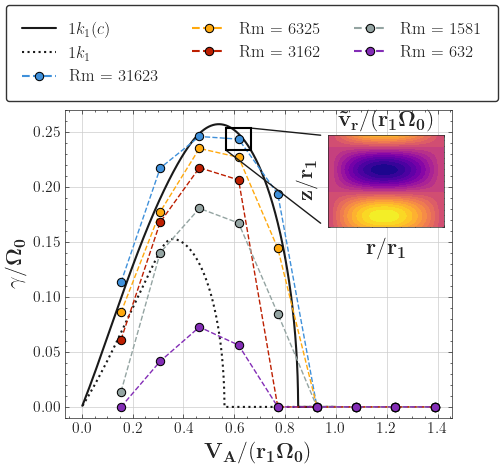

In [64]:
fig, ax = plt.subplots(1,1)
fig.set_figheight(4)
fig.set_figwidth(5)


r1 = 0.1
########################## PLOTTING AR0 ##############################################################################
ax.plot(VA_l_MCI1_AR0,gr_1k1_MCI_l_AR0, color = 'k', label =f'Shooting $k_z = 1k_1$ (c)', linewidth=1.5)
ax.plot(VA_h_MCI1_AR0,gr_1k1_MCI_h_AR0, color = 'k', linewidth=1.5)   
ax.plot(VA_l_MRI1_AR0,gr_1k1_MRI_l_AR0, color = 'k', label =f'Shooting $k_z = 1k_1$', linewidth=1.5, linestyle = ':')
ax.plot(VA_h_MRI1_AR0,gr_1k1_MRI_h_AR0, color = 'k', linewidth=1.5, linestyle = ':')    

eta_arr = [0.1, 0.5, 1, 2, 5]
V0 = r1*Omega0
eta_arr = [0.1, 0.5, 1, 2, 5]
Rm = r1*V0/np.array(eta_arr) 
for i in range(0, len(eta)):
        ax.plot(vA/(r1*Omega0*10000), etaplot_AR0[i]/(Omega0), 'o', color = color_arr[i], linestyle = '--', label=r'NIMROD ($\eta = $ ' + str(eta_arr[i]) + ', Rm = ' + str(int(Rm[i])) + ')', markeredgecolor='black', markeredgewidth = 0.75)



###################################
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from matplotlib.patches import Rectangle
pos = ax.get_position()
# Define inset axes using figure.add_axes, relative to the subplot's position
inset_top = fig.add_axes([
    pos.x0 + 0.68 * pos.width,  # Left position relative to subplot
    pos.y0 + 0.62 * pos.height, # Bottom position relative to subplot
    0.3 * pos.width,          # Width relative to subplot
    0.3 * pos.height          # Height relative to subplot
])


inset_top.axes.xaxis.set_ticklabels([])
inset_top.axes.yaxis.set_ticklabels([])
inset_top.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
inset_top.set_ylabel(r'$\mathbf{z/r_1}$', fontsize = 16)
cp2=inset_top.contourf(rc_AR0/0.1,zc_AR0/0.1, Vr_Eta0p1_40G_AR0,20, cmap='plasma')
inset_top.set_title(r"$\mathbf{\tilde{v}_r/(r_1\Omega_0)}$", fontsize = 16)


### ETA0.1
highlight_x_MRI = (vA/(0.1*Omega0*10000))[3]
highlight_y_MRI = etaplot_AR0[0][3]/(Omega0)


############### MRI
# Define the center and size of the rectangle
width = 0.1  # Width of the rectangle
height = 0.02  # Height of the rectangle

# Calculate the bottom-left corner coordinates
x = highlight_x_MRI - width / 2
y = highlight_y_MRI - height / 2

rect_x = x
rect_y = y
rect_width = width 
rect_height = height

# Define the rectangle's corners in the main plot
main_rect_corners = [
    (rect_x, rect_y),  # Bottom-left corner
    (rect_x + rect_width, rect_y),  # Bottom-right corner
    (rect_x, rect_y + rect_height),  # Top-left corner
    (rect_x + rect_width, rect_y + rect_height)  # Top-right corner
]

# Create a rectangle
rect = Rectangle((x, y), width, height, linewidth=1.5, edgecolor='black', facecolor='none', zorder=3)
ax.add_patch(rect)

################### PLOT LINES
# pt2 = [.94, 0.17]
# pt3 = [.94, 0.25]
pt2 = [.94, 0.167]
pt3 = [.94, 0.247]

ax.set_ylim(-0.01, 0.27)
# ax.set_xlim(-0.05, 1.75)
line1X = [main_rect_corners[2][0], pt2[0]]
line1Y = [main_rect_corners[1][1],pt2[1]] 
line2X = [main_rect_corners[1][0], pt3[0]]
line2Y = [main_rect_corners[2][1],pt3[1]]

ax.plot(line1X, line1Y, color = 'k', zorder=2)
ax.plot(line2X, line2Y, color = 'k', zorder=2)


ax.set_xlabel(r'$\mathbf{{V_A}/(r_1\Omega_0)}$', fontsize = 16)
ax.set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', fontsize = 16)
# ############################################################################
from matplotlib.lines import Line2D

box = ax.get_position()
# Define custom legend elements
custom_lines = [
    Line2D([0], [0], color='k', lw=1.5, marker = '', linestyle = '-'),  # Custom line for A
    Line2D([0], [0], color='k', lw=1.5, marker = '', linestyle = ':'),
    Line2D([0], [0], color=color_arr[0], lw=1.5, marker = 'o', markeredgecolor='black', markeredgewidth = 0.75, linestyle = '--'),  # Custom line for A
    Line2D([0], [0], color=color_arr[1], lw=1.5, marker = 'o', markeredgecolor='black', markeredgewidth = 0.75, linestyle = '--'),  # Custom line for A
    Line2D([0], [0], color=color_arr[2], lw=1.5, marker = 'o', markeredgecolor='black', markeredgewidth = 0.75, linestyle = '--'),  # Custom line for A
    Line2D([0], [0], color=color_arr[3], lw=1.5, marker = 'o', markeredgecolor='black', markeredgewidth = 0.75, linestyle = '--'),  # Custom line for A
    Line2D([0], [0], color=color_arr[4], lw=1.5, marker = 'o', markeredgecolor='black', markeredgewidth = 0.75, linestyle = '--'),  # Custom line for A

]
labels = [r'$1k_1 (c)$', r'$1k_1$', 'Rm = 31623', 'Rm = 6325', 'Rm = 3162', 'Rm = 1581', 'Rm = 632']
fig.legend(custom_lines, labels, loc='lower center', ncol=3, 
           bbox_to_anchor=(0.5, .86),  # Position the legend below the plot
           frameon=True,  # Turn on the frame (border)
           edgecolor='black',  # Set the border color
           facecolor='white',  # Set the background color of the legend box
           borderpad=1,  # Padding between the legend text and the border
           borderaxespad=1, fontsize = 12)

# plt.tight_layout()
plt.savefig('Shooting-NIMROD-comp/GRvsAlfvenSpeed-NIMROD-AR0.pdf', bbox_inches='tight', dpi = 400)
plt.show()
plt.close()

[31622.77660168  6324.55532034  3162.27766017  1581.13883008
   632.45553203]
5


C:\Users\Alex\AppData\Local\Temp\ipykernel_37228\1189102893.py:190: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


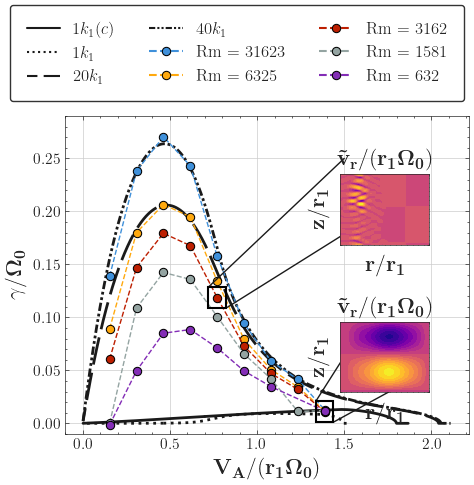

In [ ]:
fig, ax = plt.subplots(1,1)
fig.set_figheight(4)
fig.set_figwidth(5)


r1 = 0.1
########################## PLOTTING AR0 ##############################################################################
plt.plot(VA_l_MCI1_AR2,gr_1k1_MCI_l_AR2, color = 'k', label =f'Shooting $k_z = 1k_1$ (c)', linewidth=2)
plt.plot(VA_h_MCI1_AR2[0:len(VA_h_MCI1_AR2)-275],gr_1k1_MCI_h_AR2[0:len(VA_h_MCI1_AR2)-275], color = 'k', linewidth=2)    
plt.plot(VA_h_MRI1_AR2,gr_1k1_MRI_l_AR2, color = 'k', label =f'Shooting $k_z = 1k_1$', linestyle = ':', linewidth=2)
plt.plot(VA_l_MRI1_AR2[0:len(VA_h_MCI1_AR2)-500],gr_1k1_MRI_h_AR2[0:len(VA_h_MCI1_AR2)-500], color = 'k', linestyle = ':', linewidth=2)    
plt.plot(VA_h_MRI20_AR2,gr_20k1_MRI_l_AR2, color = 'k', label =f'Shooting $k_z = 20k_1$', linestyle = (5, (10, 3)), linewidth=2)  
plt.plot(VA_l_MRI20_AR2[0:len(VA_l_MRI20_AR2)-675],gr_20k1_MRI_h_AR2[0:len(VA_l_MRI20_AR2)-675], color = 'k', linestyle = (5, (10, 3)), linewidth=2)  
plt.plot(VA_h_MRI40_AR2,gr_40k1_MRI_l_AR2, color = 'k', label =f'Shooting $k_z = 40k_1$', linestyle = (0, (3, 1, 1, 1, 1, 1)), linewidth=2)  
plt.plot(VA_l_MRI40_AR2[0:len(VA_l_MRI40_AR2)-600],gr_40k1_MRI_h_AR2[0:len(VA_l_MRI40_AR2)-600], color = 'k', linestyle = (0, (3, 1, 1, 1, 1, 1)), linewidth=2)  

V0 = r1*Omega0
eta_arr = [0.1, 0.5, 1, 2, 5]

print(0.1**2*Omega0/eta_arr)

print(len(eta_arr))
Rm = r1*V0/np.array(eta_arr) 
for i in range(0, len(eta)-1):
    plt.plot(vA/(r1*Omega0*10000), etaplot_AR2[i]/(Omega0), 'o', label=r'NIMROD, Rm = ' + str(int(Rm[i])), color = color_arr[i], linestyle = '--', markeredgecolor='black', markeredgewidth = 0.75)
eta_arr = [5]
Rm = r1*V0/np.array(eta_arr)
plt.plot(vA_ETA5/(r1*Omega0*10000), ETA5_curr/(Omega0), 'o', label=r'NIMROD, Rm = ' + str(int(Rm[0])), color = color_arr[4], linestyle = '--', markeredgecolor='black', markeredgewidth = 0.75)


###################################
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from matplotlib.patches import Rectangle
########################## MRI PLOT
pos = ax.get_position()
# Define inset axes using figure.add_axes, relative to the subplot's position
inset_top = fig.add_axes([
    pos.x0 + 0.75 * pos.width,  # Left position relative to subplot
    pos.y0 + 0.68 * pos.height, # Bottom position relative to subplot
    0.23 * pos.width,          # Width relative to subplot
    0.23 * pos.height          # Height relative to subplot
])

inset_top.axes.xaxis.set_ticklabels([])
inset_top.axes.yaxis.set_ticklabels([])
inset_top.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
inset_top.set_ylabel(r'$\mathbf{z/r_1}$', fontsize = 16)
cp2=inset_top.contourf(rc_AR2/0.1,zc_AR2/0.1, Vr_Eta1_50G_AR2,20, cmap='plasma')
inset_top.set_title(r"$\mathbf{\tilde{v}_r/(r_1\Omega_0)}$", fontsize = 16)


### ETA0.1
highlight_x_MRI = (vA/(0.1*Omega0*10000))[4]
highlight_y_MRI = etaplot_AR2[2][4]/(Omega0)


############### MRI
width = 0.1  # Width of the rectangle
height = 0.02  # Height of the rectangle
# Calculate the bottom-left corner coordinates
x = highlight_x_MRI - width / 2
y = highlight_y_MRI - height / 2

rect_x = x
rect_y = y
rect_width = width 
rect_height = height

# Define the rectangle's corners in the main plot
main_rect_corners = [
    (rect_x, rect_y),  # Bottom-left corner
    (rect_x + rect_width, rect_y),  # Bottom-right corner
    (rect_x, rect_y + rect_height),  # Top-left corner
    (rect_x + rect_width, rect_y + rect_height)  # Top-right corner
]

# Create a rectangle
rect = Rectangle((x, y), width, height, linewidth=1.5, edgecolor='black', facecolor='none', zorder=3)
ax.add_patch(rect)

################### PLOT LINES
# pt2 = [1.7, 0.2]
pt2 = [1.62, 0.191]

# pt3 = [1.65, 0.27]
pt3 = [1.5, 0.25]

# ax.set_xlim(-0.05, 1.75)
line1X = [main_rect_corners[1][0], pt2[0]]
line1Y = [main_rect_corners[0][1],pt2[1]] 
line2X = [main_rect_corners[0][0], pt3[0]]
line2Y = [main_rect_corners[2][1],pt3[1]]

ax.plot(line1X, line1Y, color = 'k', zorder=2)
ax.plot(line2X, line2Y, color = 'k', zorder=2)


#########################
pos = ax.get_position()
# Define inset axes using figure.add_axes, relative to the subplot's position
inset_top = fig.add_axes([
    pos.x0 + 0.75 * pos.width,  # Left position relative to subplot
    pos.y0 + 0.2 * pos.height, # Bottom position relative to subplot
    0.23 * pos.width,          # Width relative to subplot
    0.23 * pos.height          # Height relative to subplot
])

################################################################
inset_top.axes.xaxis.set_ticklabels([])
inset_top.axes.yaxis.set_ticklabels([])
inset_top.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
inset_top.set_ylabel(r'$\mathbf{z/r_1}$', fontsize = 16)
cp2=inset_top.contourf(rc_AR2/0.1,zc_AR2/0.1, Vr_Eta5_90G_AR2,20, cmap='plasma')
inset_top.set_title(r"$\mathbf{\tilde{v}_r/(r_1\Omega_0)}$", fontsize = 16)


### ETA0.1
highlight_x_MRI = (vA/(0.1*Omega0*10000))[8]
highlight_y_MRI = etaplot_AR2[2][8]/(Omega0)


############### MRI
width = 0.1  # Width of the rectangle
height = 0.02  # Height of the rectangle
# Calculate the bottom-left corner coordinates
x = highlight_x_MRI - width / 2
y = highlight_y_MRI - height / 2

rect_x = x
rect_y = y
rect_width = width 
rect_height = height

# Define the rectangle's corners in the main plot
main_rect_corners = [
    (rect_x, rect_y),  # Bottom-left corner
    (rect_x + rect_width, rect_y),  # Bottom-right corner
    (rect_x, rect_y + rect_height),  # Top-left corner
    (rect_x + rect_width, rect_y + rect_height)  # Top-right corner
]

# Create a rectangle
rect = Rectangle((x, y), width, height, linewidth=1.5, edgecolor='black', facecolor='none', zorder=3)
ax.add_patch(rect)

################### PLOT LINES
pt2 = [1.76, 0.03]
pt3 = [1.5, 0.063]

ax.set_ylim(-0.01, 0.29)
# ax.set_xlim(-0.05, 1.75)
line1X = [main_rect_corners[1][0], pt2[0]]
line1Y = [main_rect_corners[0][1],pt2[1]] 
line2X = [main_rect_corners[0][0], pt3[0]]
line2Y = [main_rect_corners[2][1],pt3[1]]

ax.plot(line1X, line1Y, color = 'k', zorder=2)
ax.plot(line2X, line2Y, color = 'k', zorder=2)


ax.set_xlabel(r'$\mathbf{{V_A}/(r_1\Omega_0)}$', fontsize = 16)
ax.set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', fontsize = 16)
# ############################################################################
from matplotlib.lines import Line2D

box = ax.get_position()
# Define custom legend elements
custom_lines = [
    Line2D([0], [0], color='k', lw=1.5, marker = '', linestyle = '-'),  # Custom line for A
    Line2D([0], [0], color='k', lw=1.5, marker = '', linestyle = ':'),
    Line2D([0], [0], color='k', lw=1.5, marker = '', linestyle = (5, (10, 3))),
    Line2D([0], [0], color='k', lw=1.5, marker = '', linestyle = (0, (3, 1, 1, 1, 1, 1))),
    Line2D([0], [0], color=color_arr[0], lw=1.5, marker = 'o', markeredgecolor='black', markeredgewidth = 0.75, linestyle = '--'),  # Custom line for A
    Line2D([0], [0], color=color_arr[1], lw=1.5, marker = 'o', markeredgecolor='black', markeredgewidth = 0.75, linestyle = '--'),  # Custom line for A
    Line2D([0], [0], color=color_arr[2], lw=1.5, marker = 'o', markeredgecolor='black', markeredgewidth = 0.75, linestyle = '--'),  # Custom line for A
    Line2D([0], [0], color=color_arr[3], lw=1.5, marker = 'o', markeredgecolor='black', markeredgewidth = 0.75, linestyle = '--'),  # Custom line for A
    Line2D([0], [0], color=color_arr[4], lw=1.5, marker = 'o', markeredgecolor='black', markeredgewidth = 0.75, linestyle = '--'),  # Custom line for A

]

labels = [r'$1k_1 (c)$', r'$1k_1$', r'$20k_1$', r'$40k_1$', 'Rm = 31623', 'Rm = 6325', 'Rm = 3162', 'Rm = 1581', 'Rm = 632']
fig.legend(custom_lines, labels, loc='lower center', ncol=3, 
           bbox_to_anchor=(0.5, .86),  # Position the legend below the plot
           frameon=True,  # Turn on the frame (border)
           edgecolor='black',  # Set the border color
           facecolor='white',  # Set the background color of the legend box
           borderpad=1,  # Padding between the legend text and the border
           borderaxespad=1, fontsize = 12)

plt.tight_layout()


plt.savefig('Shooting-NIMROD-comp/GRvsAlfvenSpeed-NIMROD-AR2.pdf', bbox_inches='tight', dpi = 400)
plt.show()
plt.close()